In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/Users/vaishakhmenon/Downloads/IIMK_DSAI_Required Assignment_Data Set_TitanicDataSet.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its columns to check the structure
print(data.head())
print(data.columns)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

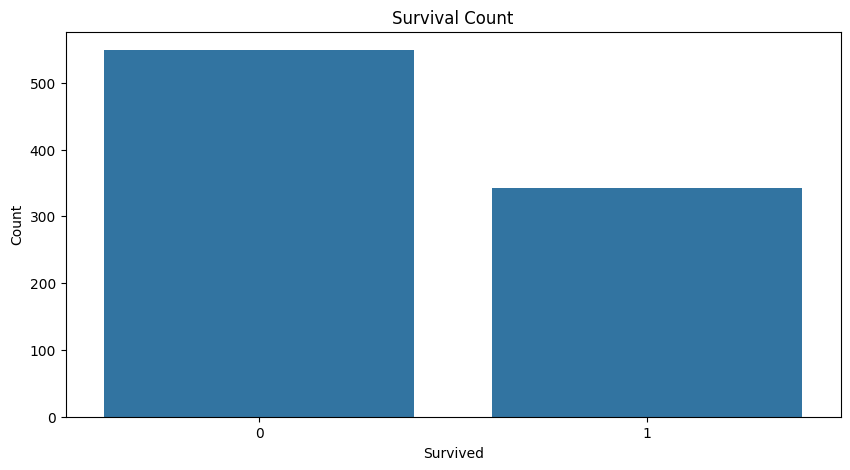

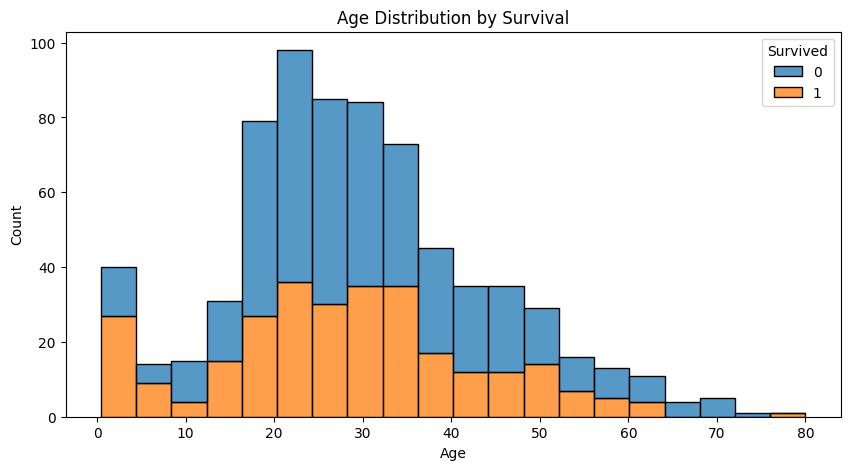

In [2]:
# Data Visualization

# Plot 1: Countplot of Survival
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot 2: Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [3]:
# Prepare data to build a classification model

# Convert 'Sex' to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Check if 'Embarked' column exists
if 'Embarked' in data.columns:
    # Create dummy variables for 'Embarked'
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
else:
    print("Column 'Embarked' not found in the dataset")


In [4]:
# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [5]:
# Check if columns 'Cabin', 'Name', 'Ticket' exist before dropping them
columns_to_drop = ['Cabin', 'Name', 'Ticket']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Define features and labels
X = data.drop(columns=['Survived'])
y = data['Survived']

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Perform scaling of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes of train and test data
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (712, 9)
Test data shape: (179, 9)


In [8]:
# Import necessary libraries for model building
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Naive Bayes Model Building

# Build the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the train dataset
nb_model.fit(X_train, y_train)

# Print the model summary by predicting on the test data and showing classification report
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Model Summary")
print("Accuracy:", accuracy_nb)
print("Classification Report:\n", report_nb)

Naive Bayes Model Summary
Accuracy: 0.770949720670391
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [9]:
# Evaluate Naive Bayes model
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

print("Naive Bayes Model Performance")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("F1 Score:", f1_nb)
print("AUC-ROC:", roc_auc_nb)

Naive Bayes Model Performance
Accuracy: 0.770949720670391
Confusion Matrix:
 [[84 21]
 [20 54]]
F1 Score: 0.7248322147651006
AUC-ROC: 0.8536679536679537


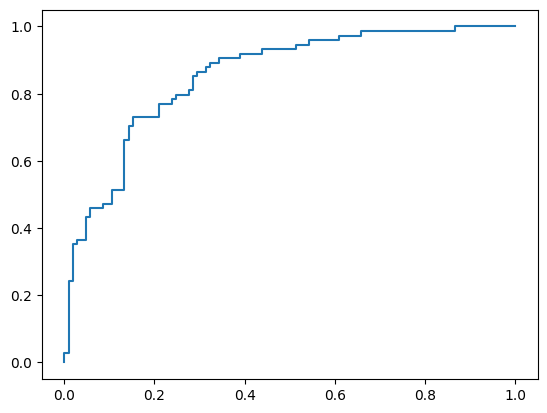

In [10]:
# Plot ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)

In [11]:
# Import necessary libraries for model building
from sklearn.svm import SVC

In [12]:
# SVM Model Building

# Build the SVM model
svm_model = SVC(probability=True)

# Train the model on the train dataset
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [13]:
# Print the model summary by predicting on the test data and showing classification report
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Summary")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)


SVM Model Summary
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [14]:
# Evaluate SVM model
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

print("SVM Model Performance")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("F1 Score:", f1_svm)
print("AUC-ROC:", roc_auc_svm)

SVM Model Performance
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
F1 Score: 0.7536231884057971
AUC-ROC: 0.8634491634491634


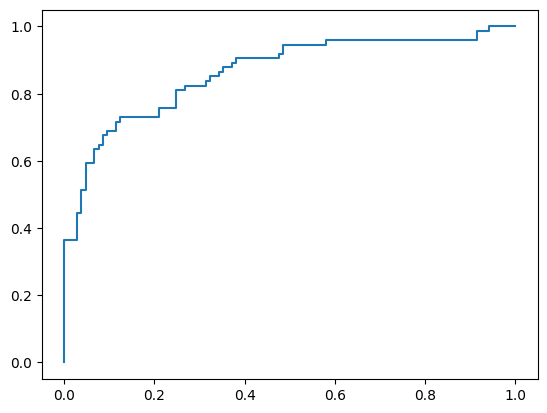

In [15]:
# Plot ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)


/var/folders/km/0qpkpdgj6zq4v3zzkt9dgf5c0000gn/T/ipykernel_45570/1010875466.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


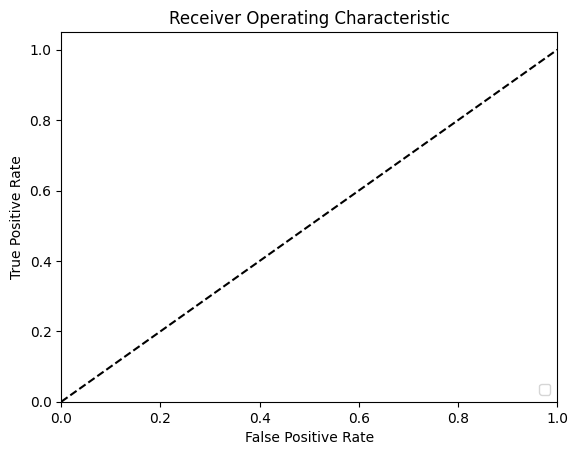

In [16]:
# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Import necessary libraries for model building
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Build and train the SVM model
svm_model = SVC(probability=True)  # Initialize the SVM model with probability estimates enabled
svm_model.fit(X_train, y_train)    # Train the model using the training data


SVC(probability=True)

SVM Model Summary
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

SVM Model Performance
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
F1 Score: 0.7536231884057971
AUC-ROC: 0.8634491634491634


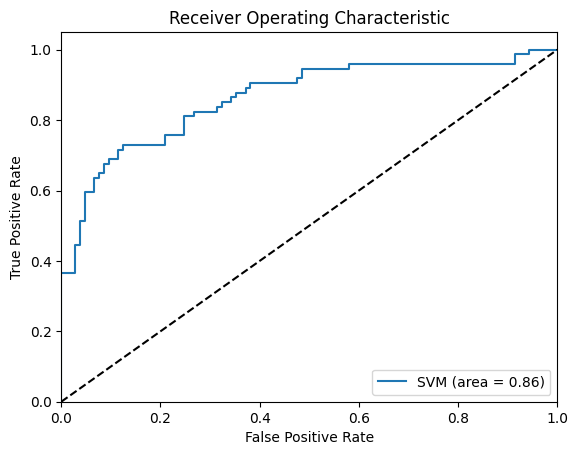

Comparison of SVM and Naive Bayes Models
Naive Bayes - Accuracy: 0.770949720670391 F1 Score: 0.7248322147651006 AUC-ROC: 0.8536679536679537
SVM - Accuracy: 0.8100558659217877 F1 Score: 0.7536231884057971 AUC-ROC: 0.8634491634491634


In [19]:
# Predict on the test data and evaluate the model
y_pred_svm = svm_model.predict(X_test)  # Make predictions on the test data
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculate the accuracy
report_svm = classification_report(y_test, y_pred_svm)  # Generate a classification report

print("SVM Model Summary")
print("Accuracy:", accuracy_svm)  # Print the accuracy
print("Classification Report:\n", report_svm)  # Print the classification report

# Evaluate the SVM model with more metrics
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)  # Generate a confusion matrix
f1_svm = f1_score(y_test, y_pred_svm)  # Calculate the F1 score
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)  # Calculate the AUC-ROC score

print("SVM Model Performance")
print("Accuracy:", accuracy_svm)  # Print the accuracy again for emphasis
print("Confusion Matrix:\n", conf_matrix_svm)  # Print the confusion matrix
print("F1 Score:", f1_svm)  # Print the F1 score
print("AUC-ROC:", roc_auc_svm)  # Print the AUC-ROC score

# Plot the ROC curve for the SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)  # Calculate the false positive rate and true positive rate
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)  # Plot the ROC curve and label it with the AUC-ROC score

# To avoid the UserWarning, ensure the label is correctly specified in the plot command

# Add a diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Add labels, title, and legend to the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compare performances with Naive Bayes model if already evaluated and available
# (The following lines assume that you have already evaluated the Naive Bayes model as described in previous steps)

# Print comparison of SVM and Naive Bayes models
print("Comparison of SVM and Naive Bayes Models")
print("Naive Bayes - Accuracy:", accuracy_nb, "F1 Score:", f1_nb, "AUC-ROC:", roc_auc_nb)
print("SVM - Accuracy:", accuracy_svm, "F1 Score:", f1_svm, "AUC-ROC:", roc_auc_svm)


In [ ]:
#Accuracy: The SVM model has a higher accuracy than the Naive Bayes model, meaning it made more correct predictions.
#Confusion Matrix: The SVM model had fewer errors in predicting survivors and non-survivors.
#F1 Score: The SVM model has a higher F1 score, indicating a better balance between precision and recall.
#AUC-ROC: The SVM model performed better at distinguishing between survivors and non-survivors.





